In [ ]:
import piplite
await piplite.install('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


Импотируем все нужные модули для работы

In [13]:
df = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')

Импортируем нашу таблицу

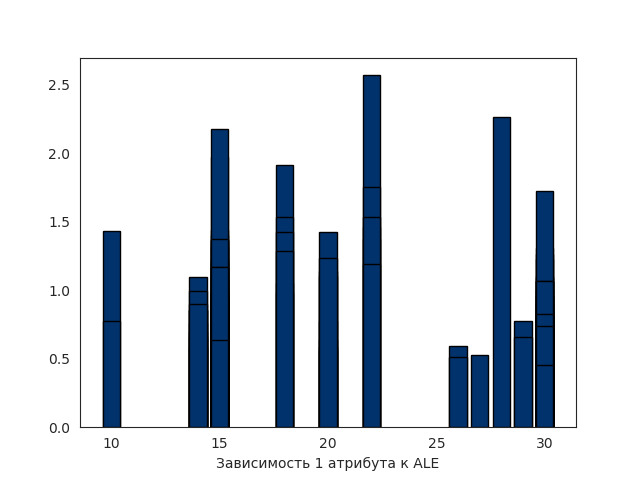

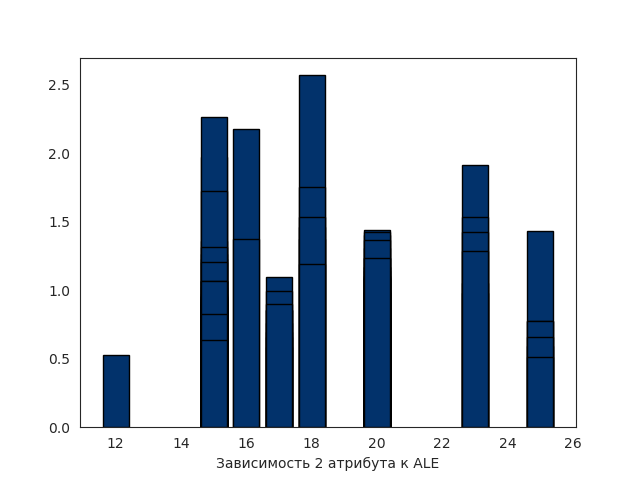

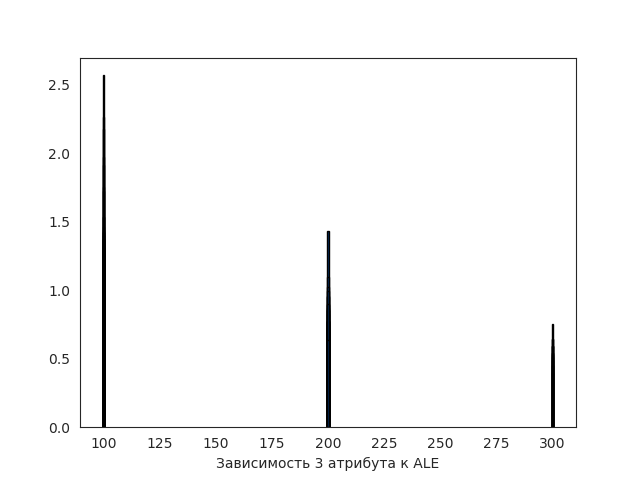

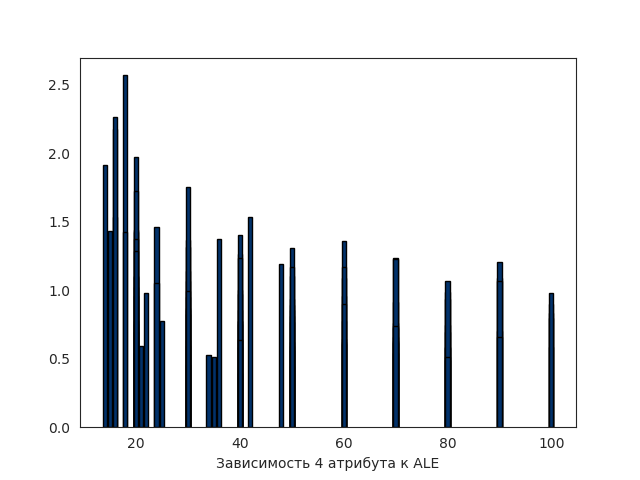

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure()
plt.bar(df['anchor_ratio'],df['ale'], ec='black', color='#02326b')
plt.xlabel('Зависимость 1 атрибута к ALE')
plt.show()
plt.bar(df['trans_range'],df['ale'], ec='black', color='#02326b')
plt.xlabel('Зависимость 2 атрибута к ALE')
plt.show()
plt.bar(df['node_density'],df['ale'], ec='black', color='#02326b')
plt.xlabel('Зависимость 3 атрибута к ALE')
plt.show()
plt.bar(df['iterations'],df['ale'], ec='black', color='#02326b')
plt.xlabel('Зависимость 4 атрибута к ALE')
plt.show()

Отображаем с помощью гистограммы зависимости каждого из 4 атрибутов (столбцы 1-4) к целевой переменной ALE

In [ ]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

В табличном виде такое воспринимать обычно неудобно, поэтому визуализируем его с помощью heatmap

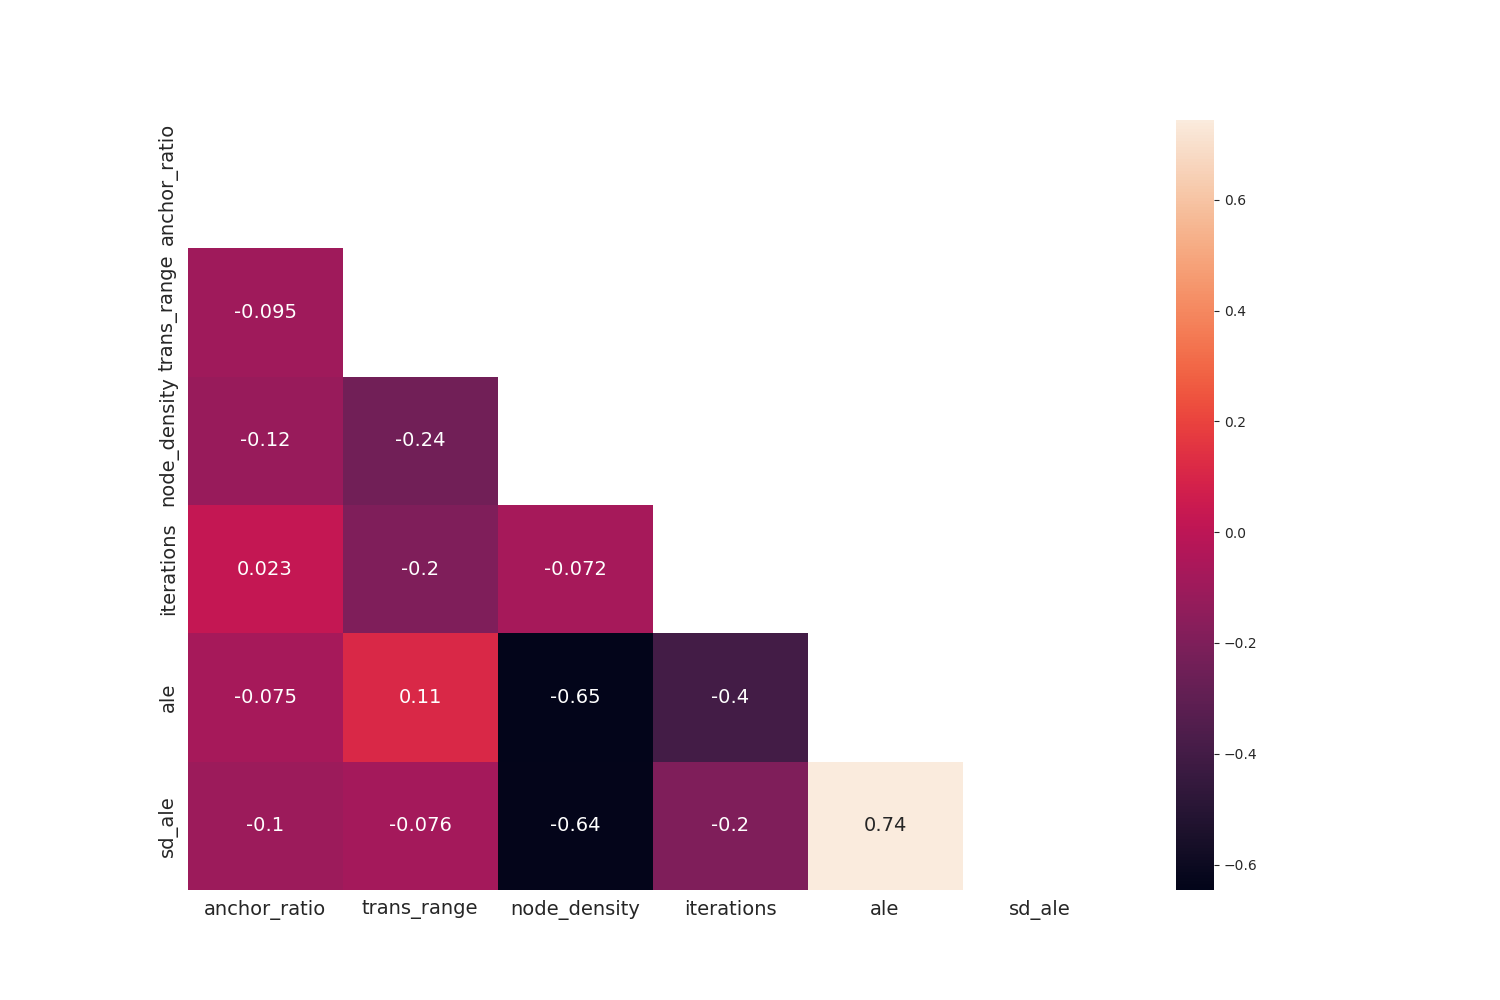

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
Корреляция должна считаться нормальной от 0.2, атрибуты с таргетом коррилируют сильно это высокая корреляция! 

In [48]:
df.drop('sd_ale', axis=1)

,anchor_ratio,trans_range,node_density,iterations,ale
0,30,15,200,40,0.773546
1,15,15,100,70,0.911941
2,30,15,100,50,0.814867
3,15,20,100,20,1.435332
4,30,15,100,40,1.265909
...,...,...,...,...,...
102,18,23,100,20,1.287472
103,14,17,200,60,0.899102
104,15,20,100,50,1.171140
105,20,20,100,40,1.234493


Дропаем лишнюю колонку

coef: [-0.00454369]
score 0.0056246135668754915


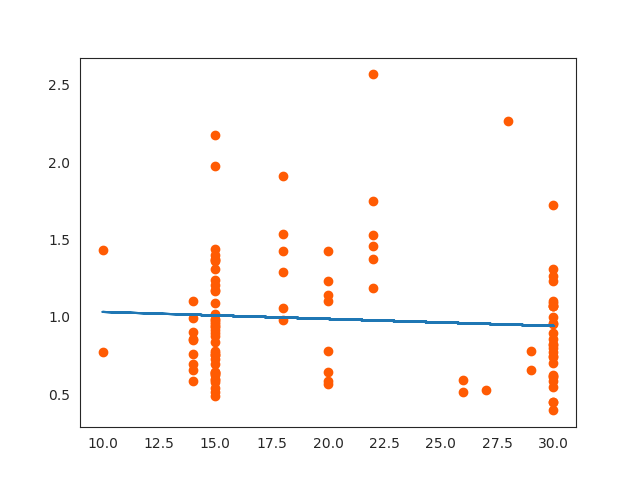

<Figure size 640x480 with 0 Axes>

In [56]:
y = np.array(df['ale'])
x = np.array(df['anchor_ratio']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(df['anchor_ratio'], df['ale'], color='#ff5b03')
plt.plot(x, model.predict(x))
plt.show()

In [ ]:
Линейная регрессия 1 атрибута к таргету

coef: [0.01436397]
score 0.011948396959491459


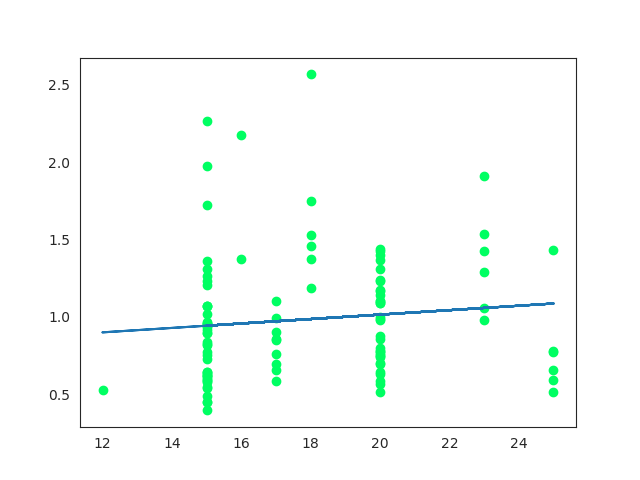

<Figure size 640x480 with 0 Axes>

In [60]:
y = np.array(df['ale'])
x = np.array(df['trans_range']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(df['trans_range'], df['ale'], color='#00ff62')
plt.plot(x, model.predict(x))
plt.show()

In [ ]:
Линейная регрессия 2 атрибута к таргету

coef: [-0.00370479]
score 0.4172217579204366


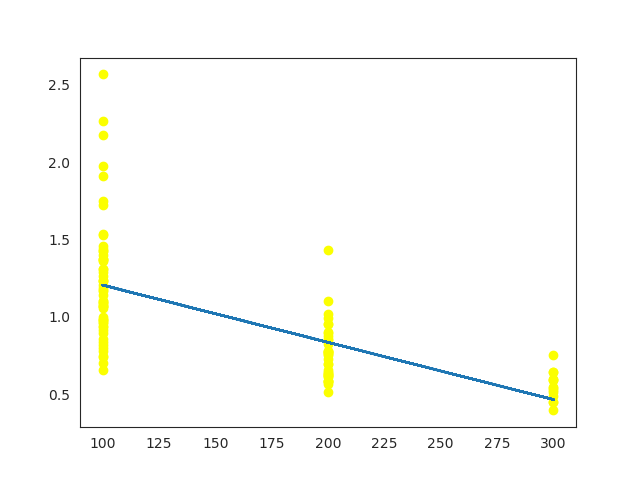

<Figure size 640x480 with 0 Axes>

In [61]:
y = np.array(df['ale'])
x = np.array(df['node_density']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(df['node_density'], df['ale'], color='#fbff00')
plt.plot(x, model.predict(x))
plt.show()

In [ ]:
Линейная регрессия 3 атрибута к таргету

coef: [-0.00662723]
score 0.16031556573386607


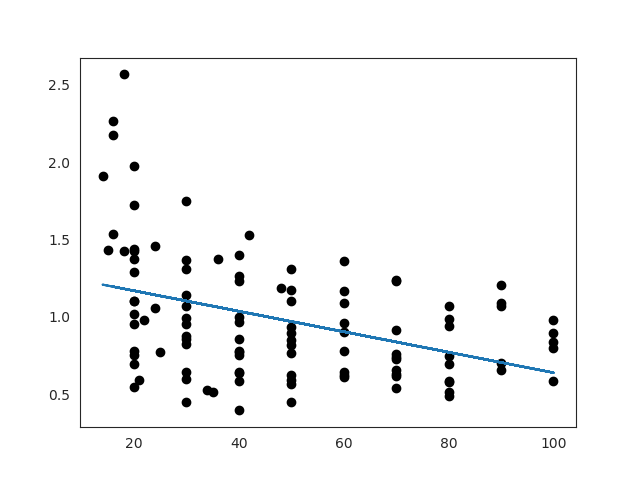

<Figure size 640x480 with 0 Axes>

In [62]:
y = np.array(df['ale'])
x = np.array(df['iterations']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(df['iterations'], df['ale'], color='#000000')
plt.plot(x, model.predict(x))
plt.show()

In [83]:
dz = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')
sd = dz['ale']
features = dz.drop('ale', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    sd, test_size=0.3215, random_state=10)

In [84]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
print('coef array:', regr.coef_)

Training data 0.7277372074645941
Test data r-squared:  0.6762976211888914
Intercepr 1.808919742813385
coef array: [-0.00870772 -0.00612174 -0.00272267 -0.00633267  0.74662858]


Выводим итоговый коэффициент и intercept

In [81]:
dz.describe()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,20.523364,17.878505,159.813084,47.887850,0.983471,0.265692
std,6.739556,3.107235,71.189109,24.668874,0.408313,0.183394
min,10.000000,12.000000,100.000000,14.000000,0.394029,0.003267
25%,15.000000,15.000000,100.000000,30.000000,0.655368,0.128437
50%,18.000000,17.000000,100.000000,40.000000,0.899102,0.242423
75%,30.000000,20.000000,200.000000,70.000000,1.196418,0.362762
max,30.000000,25.000000,300.000000,100.000000,2.568407,1.092220


In [ ]:
Вывод основных статестический данных датафрейма